In [1]:
import gudhi as gd
print(gd.__version__)

3.6.0


In [11]:
from sklearn import datasets
circles, labels = datasets.make_circles(n_samples=100, noise=0.06, factor=0.5)
print('Data dimension:{}'.format(circles.shape))

Data dimension:(100, 2)


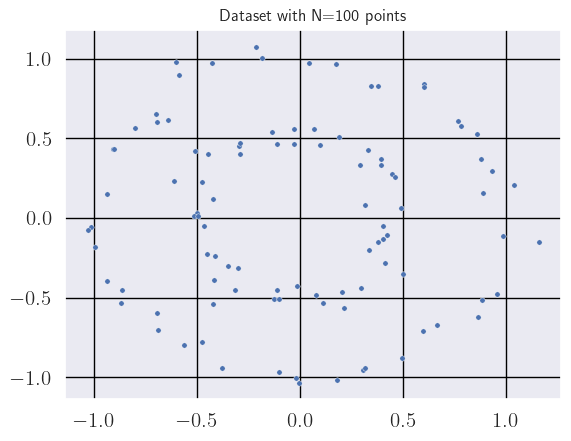

In [68]:
import matplotlib.pyplot as plt; 
import seaborn as sns
sns.set()

fig = plt.figure()
ax = fig.add_subplot(111)
ax = sns.scatterplot(x=circles[:,0], y=circles[:,1],   s=15)
plt.title('Dataset with N=%s points'%(circles.shape[0]))
plt.grid(color = 'black', linestyle = '-', linewidth = 1)
plt.savefig('circles2.png' , dpi=600, transparent=True)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [13]:
%%time
# The RipsComplex() function creates a one skeleton graph from the point cloud.
Rips_complex = gd.RipsComplex(circles, max_edge_length=0.6) 

CPU times: total: 31.2 ms
Wall time: 1.78 ms


In [14]:
%%time
# The create_simplex_tree() method creates the filtered complex.
Rips_simplex_tree = Rips_complex.create_simplex_tree(max_dimension=2) 

CPU times: total: 0 ns
Wall time: 10.5 ms


In [15]:
%%time
# The get_filtration() method computes the simplices of the filtration
filt_Rips = list(Rips_simplex_tree.get_filtration())

CPU times: total: 62.5 ms
Wall time: 64.5 ms


In [69]:
import numpy as np

eps = 0.15
triangles = np.array([s[0] for s in Rips_simplex_tree.get_skeleton(2) if len(s[0])==3 and s[1] <= eps])

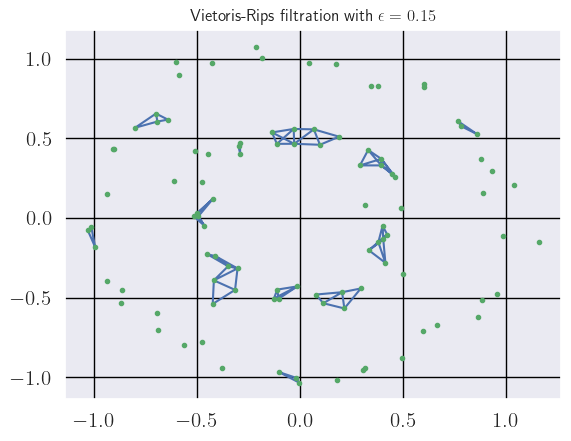

In [70]:
plt.triplot(circles[:,0], circles[:,1], triangles)
plt.plot(circles[:,0], circles[:,1], '.')
plt.title("Vietoris-Rips filtration with $\epsilon=0.15$")
plt.grid(color = 'black', linestyle = '-', linewidth = 1)
plt.savefig('filtration15.png' , dpi=600, transparent=True)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

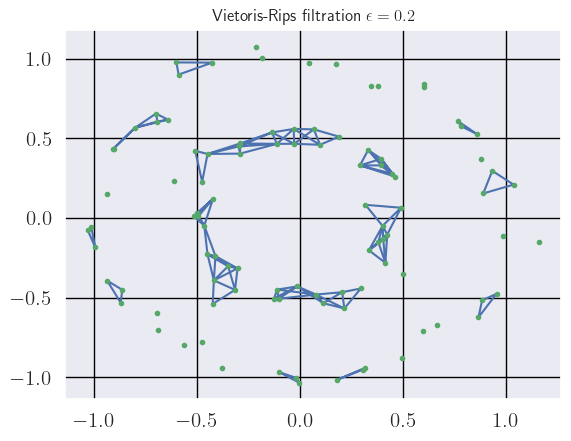

In [71]:
eps = 0.2
triangles = np.array([s[0] for s in Rips_simplex_tree.get_skeleton(2) if len(s[0])==3 and s[1] <= eps])
plt.triplot(circles[:,0], circles[:,1], triangles)
plt.plot(circles[:,0], circles[:,1], '.')
plt.title("Vietoris-Rips filtration $\epsilon=0.2$")
plt.grid(color = 'black', linestyle = '-', linewidth = 1)
plt.savefig('filtration2.png' , dpi=600, transparent=True)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

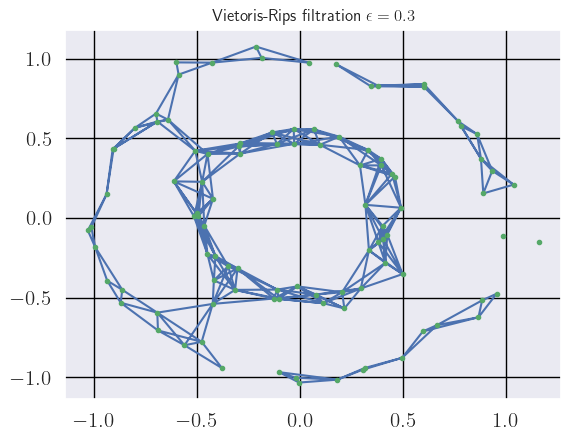

In [72]:
eps = 0.3
triangles = np.array([s[0] for s in Rips_simplex_tree.get_skeleton(2) if len(s[0])==3 and s[1] <= eps])
plt.triplot(circles[:,0], circles[:,1], triangles)
plt.plot(circles[:,0], circles[:,1], '.')
plt.title("Vietoris-Rips filtration $\epsilon=0.3$")
plt.grid(color = 'black', linestyle = '-', linewidth = 1)
plt.savefig('filtration3.png' , dpi=600, transparent=True)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [23]:
%%time
# We can compute persistence on the simplex tree structure using the persistence() method
diag_Rips = Rips_simplex_tree.persistence()

CPU times: total: 0 ns
Wall time: 5.61 ms


CPU times: total: 688 ms
Wall time: 5.22 s


(array([-0.1       ,  0.        ,  0.1       ,  0.2       ,  0.3       ,
         0.4       ,  0.5       ,  0.60138085]),
 [Text(0, -0.1, '-0.100'),
  Text(0, 0.0, '0.000'),
  Text(0, 0.1, '0.100'),
  Text(0, 0.20000000000000004, '0.200'),
  Text(0, 0.30000000000000004, '0.300'),
  Text(0, 0.4, '0.400'),
  Text(0, 0.5000000000000001, '0.500'),
  Text(0, 0.6013808465202101, '$+\\infty$')])

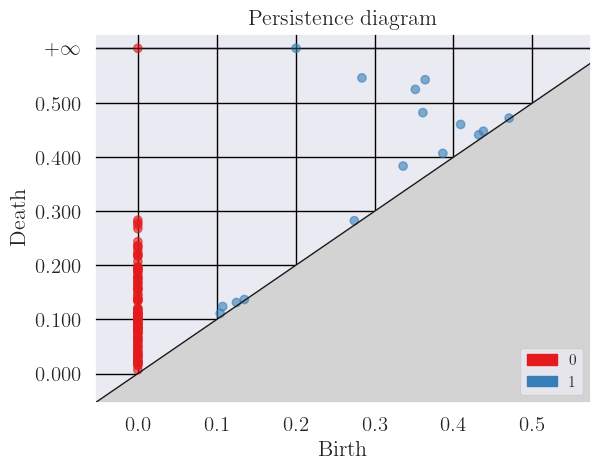

In [73]:
%%time
gd.plot_persistence_diagram(diag_Rips,legend=True)
plt.grid(color = 'black', linestyle = '-', linewidth = 1)
plt.savefig('persitencediagramCircles.png' , dpi=600, transparent=True)
plt.xticks(size=15)
plt.yticks(size=15)

CPU times: total: 750 ms
Wall time: 2.63 s


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0.0, '$\\mathdefault{0}$'),
  Text(0, 20.0, '$\\mathdefault{20}$'),
  Text(0, 40.0, '$\\mathdefault{40}$'),
  Text(0, 60.0, '$\\mathdefault{60}$'),
  Text(0, 80.0, '$\\mathdefault{80}$'),
  Text(0, 100.0, '$\\mathdefault{100}$'),
  Text(0, 120.0, '$\\mathdefault{120}$')])

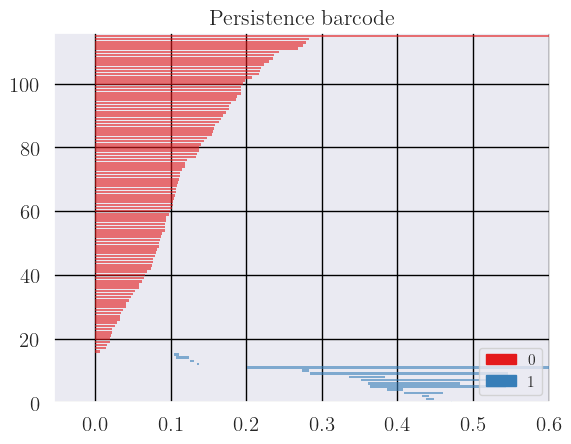

In [74]:
%%time
gd.plot_persistence_barcode(diag_Rips,legend=True)
plt.grid(color = 'black', linestyle = '-', linewidth = 1)
plt.savefig('persistencebarcodeCircles' , dpi=600, transparent=True)
plt.xticks(size=15)
plt.yticks(size=15)
